# Objective

The objective of this exercise was to use the word2vec word embeddings generated from the BlazingText algorithms (AWS Sagemaker) and perform a t-SNE plot to understand where the individual words cluster together

# Generating the word2vect embedding

Listed are the steps to generate the word embedding vector. See https://docs.aws.amazon.com/sagemaker/latest/dg/blazingtext.html . The steps are similar for generating a classification algorithm using BlazingText - see BlazingTextDataPrepTrainEval.ipynb - except instead of setting "mode" to "supervised", set it to either "cbow", "skipgram" or "batch skipgram". This will generate a vectors.txt in the model.tar.gz output. 

# Set Up

You need this to read files from Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [31]:
import gensim
from gensim.models import KeyedVectors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
 
from sklearn.manifold import TSNE

# Data Preparation

In [4]:
word_vectors = KeyedVectors.load_word2vec_format('/content/gdrive/My Drive/Colab Notebooks/Octopus2/BlazingText/vectors.txt', binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [7]:
model = gensim.models.KeyedVectors.load_word2vec_format('/content/gdrive/My Drive/Colab Notebooks/Octopus2/BlazingText/vectors.txt', binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [8]:
# Test the loaded word2vec model in gensim
# We will need the raw vector for a word
print(model['computer']) 

# We will also need to get the words closest to a word
model.similar_by_word('computer')

[ 0.70022    0.35541    0.36326   -0.38854   -0.11736   -0.59329
 -0.72877   -0.096577  -0.28752    0.40663    0.19754   -1.1046
  0.55462    0.001317   0.10967   -0.31503    0.38606   -0.46041
 -0.56242   -0.35512    0.62785   -0.74861   -0.13278    0.50889
 -0.045578   0.79135    0.5657     0.048875  -0.54627    0.41312
 -0.57059    0.32633   -0.95132    0.24336    0.30836   -0.19665
 -0.66218    0.47924   -0.6433     0.20233   -0.050598  -0.50647
 -0.15463   -0.88721   -0.21073    0.59131   -0.91199    0.2341
  0.14594   -0.075721  -0.11687    0.48152    0.61422   -0.4507
 -1.2497    -0.14128    0.68752    0.41581   -0.55772   -0.07005
 -0.1719    -0.1576     0.37048    0.097916  -0.37553   -0.07243
  0.63091    0.19913   -0.13772   -0.88539    0.61698    0.45905
 -0.089049  -0.13123   -0.029008  -0.3439     0.35933   -0.24967
 -0.54872   -0.43785    0.51759   -0.83438    0.0089258 -0.093253
  1.1866    -0.28938    0.94904    0.036903   1.071     -0.13514
  0.27493   -0.27955   -0.8

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('IIS', 0.5090019702911377),
 ('Vista', 0.49701163172721863),
 ('mins', 0.4928339421749115),
 ('apache', 0.4914909899234772),
 ('FlexModule', 0.4729779362678528),
 ('MacOSX', 0.46930593252182007),
 ('jre', 0.4671078026294708),
 ('(by', 0.4634517729282379),
 ('-P', 0.4628724455833435),
 ('machine,', 0.45687857270240784)]

# Plotting t-SNE Charts

In [24]:
# This is taken from https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim 

# extract out the labels
vocab = list(model.wv.vocab)
X = model[vocab]

# build the t-SNE model
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# put the values in a dataframe
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


In [41]:
# plot the points
fig = plt.figure()
fig.set_size_inches(25, 25)
plt.figure(figsize=(200,200))
plt.scatter(df['x'], df['y'])

# add the labels in the plot
for word, pos in df.iterrows():
    plt.annotate(word,pos)

plt.savefig('/content/gdrive/My Drive/Colab Notebooks/Octopus2/BlazingText/vectors.png')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [19]:
# This is taken from https://medium.com/@aneesha/using-tsne-to-plot-a-subset-of-similar-words-from-word2vec-bb8eeaea6229

def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,100), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    #plt.figure(figsize=(20,16))
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


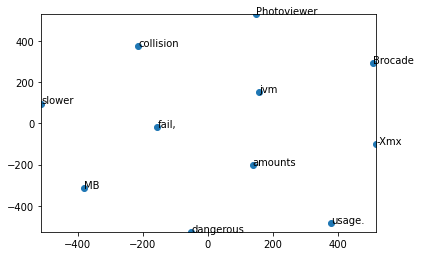

In [20]:
display_closestwords_tsnescatterplot(model, 'jvm')